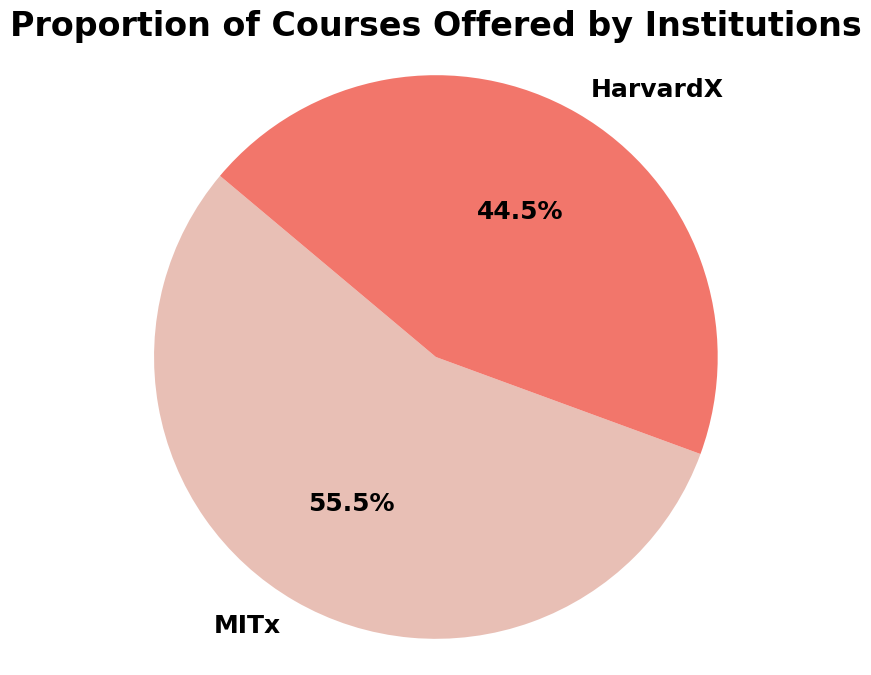

In [27]:
#Proportion of Courses Offered by Institutions

import matplotlib.pyplot as plt
import pandas as pd

# Načtení dat z tabulky "kurzy_cleaned.csv"
data = pd.read_csv("kurzy_cleaned.csv")

# Data pro pie chart
institutions = ["MITx", "HarvardX"]
courses_offered = [
    data[data["Institution"] == institution].shape[0] 
    for institution in institutions
]
colors = ['#e8bfb5', '#F2766B']  # Barvy

# Vytvoření pie chartu
plt.figure(figsize=(8, 8))
plt.pie(
    courses_offered,
    labels=institutions,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'}
)
# Nastavení nadpisu
plt.title("Proportion of Courses Offered by Institutions", fontsize=24, fontweight='bold', pad=10)

# Zajištění kruhového tvaru
plt.axis('equal')

# Uložení grafu
plt.savefig("Proportion_of_Courses_Offered_by_Institutions.png", bbox_inches='tight')

# Zobrazení grafu
plt.show()

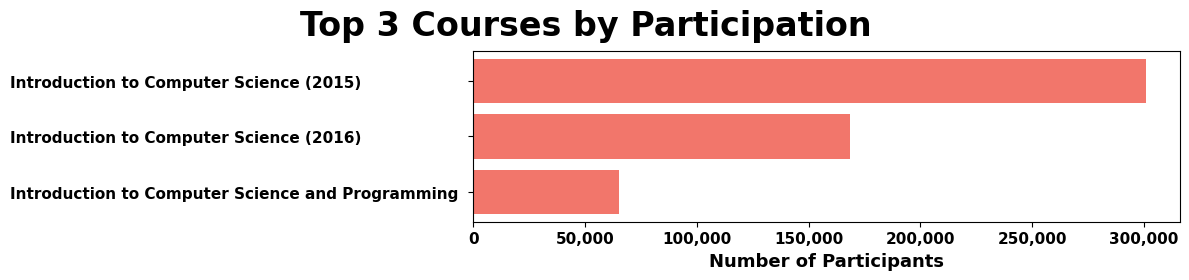

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

# Načtení dat z CSV souboru
data = pd.read_csv("kurzy_cleaned.csv")

# Seřazení dat podle počtu účastníků, sestupně
data = data.sort_values(by='Participants_(Course_Content_Accessed)', ascending=False)

# Výběr unikátních kurzů (první výskyt každého názvu)
data = data.drop_duplicates(subset='Course_Title', keep='first')

# Výběr top 3 kurzů s nejvyšším počtem účastníků
top_3_courses = data.iloc[:3].copy()

# Přidání informací o kurzu (včetně názvu a případně další úpravy)
top_3_courses['Course_Info'] = top_3_courses['Course_Title']
top_3_courses['Course_Info'] = top_3_courses['Course_Info'].replace(
    'Introduction to Computer Science', 
    'Introduction to Computer Science (2015)'
)

# Vytvoření horizontálního sloupcového grafu
plt.figure(figsize=(12, 3))  # Nastavení velikosti grafu

# Vykreslení sloupců
bars = plt.barh(
    top_3_courses['Course_Info'],  # Popisky osy y (kurzy)
    top_3_courses['Participants_(Course_Content_Accessed)'],  # Hodnoty osy x (počet účastníků)
    color='#F2766B'  # Barva sloupců
)

# Přidání hlavního nadpisu grafu (ručně umístěného)
plt.text(0.16, 1.15,  # Souřadnice textu relativně k grafu
         'Top 3 Courses by Participation',  # Text nadpisu
         fontsize=24, fontweight='bold', 
         transform=plt.gca().transAxes,  # Transformace pro relativní pozicování
         ha='center', va='center')  # Zarovnání

# Popisky os
plt.xlabel('Number of Participants', fontsize=13, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold', ha='left')

# Posunutí popisků osy y pro lepší čitelnost
plt.gca().tick_params(axis='y', pad=330)

# Na ose x formátování čísel pro oddělení tisíců čárkou
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Zvýraznění čísel na ose x
plt.gca().tick_params(axis='x', labelsize=11)
for label in plt.gca().get_xticklabels():
    label.set_fontweight('bold')

# Obrácení pořadí osy y, aby nejpopulárnější kurz byl nahoře
plt.gca().invert_yaxis()

# Automatické zarovnání prvků v grafu
plt.tight_layout()

# Uložení grafu jako obrázku ve formátu PNG
plt.savefig("top_3_courses.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()
